# Random Forest

In [1]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
# this allows plots to appear directly in the notebook %matplotlib inline
from sklearn.model_selection import KFold
# libraries for regularization
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns

sns.set()

import os, sys
import random
import sklearn

#from sklearn import cross_validation

In [2]:
# reading CSV file
data = pd.read_csv("C:\\Users\\Krina Thakkar\\featureEng.csv")

In [23]:
# split data into training and validation
train, test = train_test_split(data, train_size = 0.8)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [24]:
# initializing features and target values for training and testing
X_train = train[['loan_amnt','funded_amnt','funded_amnt_inv','installment','grade','dti','inq_last_6mths','revol_util','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','purpose_debt_consolidation','verification_status_Verified','term_ 60 months']]
y_train = train['int_rate']
X_test = test[['loan_amnt','funded_amnt','funded_amnt_inv','installment','grade','dti','inq_last_6mths','revol_util','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','purpose_debt_consolidation','verification_status_Verified','term_ 60 months']]
y_test = test['int_rate']

# Defining function to calculate accuracy score, MAE, RMS and MAPE

In [25]:
def calc_error(modelname, model, X_train, y_train, X_test, y_test):
        global error_metric
        y_train_predicted = model.predict(X_train)
        y_test_predicted = model.predict(X_test)
        
        #score
        print('Training score: {}'.format(model.score(X_train, y_train)))
        print('Test score: {}'.format(model.score(X_test, y_test)))
        print('\n')
        
        #MAE
        print(modelname,"mean_squared_error train : ",mean_squared_error(y_train, y_train_predicted))
        print(modelname,'mean_squared_error test : ',mean_squared_error(y_test, y_test_predicted))
        print('\n')
        
        #RMS
        print(modelname,'mean_absolute_error train : ',mean_absolute_error(y_train, y_train_predicted))
        print(modelname,'mean_absolute_error test: ',mean_absolute_error(y_test, y_test_predicted))
        print('\n')
        
        #MAPE
        print(modelname,'mean_absolute_percent_error (MAPE) train : ',np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100)
        print(modelname,'mean_absolute_percent_error (MAPE) test :',np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100)
        print('\n')
        
        plt.scatter(y_test,y_test_predicted)

# Random Forest

Training score: 0.9991950601893066
Test score: 0.9949915503256049


RandomForest mean_squared_error train :  0.015353010438359056
RandomForest mean_squared_error test :  0.09501554629966717


RandomForest mean_absolute_error train :  0.051672267596450695
RandomForest mean_absolute_error test:  0.13226110359892151


RandomForest mean_absolute_percent_error (MAPE) train :  0.4009799969859208
RandomForest mean_absolute_percent_error (MAPE) test : 1.0334627408619745


Random Forest completed


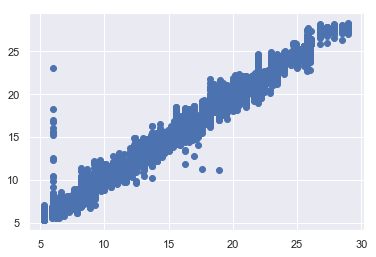

In [26]:
rf = RandomForestRegressor(n_estimators=20)
rf.fit(X_train, y_train)
calc_error('RandomForest', rf, X_train, y_train, X_test, y_test)
print("Random Forest completed")

# Random Forest with 5-fold cross validation

In [42]:
kf = KFold(n_splits=5)
dataset = data.loc[:,['loan_amnt','funded_amnt','funded_amnt_inv','installment','grade','dti','inq_last_6mths','revol_util','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','purpose_debt_consolidation','verification_status_Verified','term_ 60 months','int_rate']]
#Seperating dependent and independent variables
X_dash = dataset.iloc[:,:-1]
y1 = dataset.iloc[:,-1:]
accuracy = []
KFold(n_splits=5,shuffle=False)
for train_index, test_index in kf.split(X_dash):
    regressor = RandomForestRegressor()
    regressor.fit(X_dash.iloc[train_index],y1.iloc[train_index])
    acc = regressor.score(X_dash.iloc[test_index],y1.iloc[test_index])
    accuracy.append(acc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path whi

In [43]:
print(accuracy)

[0.9653322875679925, 0.9800499301493508, 0.991604962808314, 0.990289290406728, 0.9899111358807456]


# Hyperparameter tuning - for Random forest using GridSearchCV

In [27]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90],
    'n_estimators': [10,20]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 5)

In [28]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90], 'n_estimators': [10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
print(grid_search.best_params_)

{'bootstrap': True, 'max_depth': 80, 'n_estimators': 20}
